<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Full-code" data-toc-modified-id="Full-code-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Full code</a></span></li><li><span><a href="#Tests" data-toc-modified-id="Tests-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tests</a></span><ul class="toc-item"><li><span><a href="#Loading-isochrones:-numerical-check" data-toc-modified-id="Loading-isochrones:-numerical-check-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Loading isochrones: numerical check</a></span></li><li><span><a href="#Loading-isochrones:-visual-check" data-toc-modified-id="Loading-isochrones:-visual-check-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Loading isochrones: visual check</a></span></li><li><span><a href="#Print-info-about-a-model" data-toc-modified-id="Print-info-about-a-model-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Print info about a model</a></span></li><li><span><a href="#Data-query" data-toc-modified-id="Data-query-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Data query</a></span></li><li><span><a href="#Speed-test:-extinction-maps" data-toc-modified-id="Speed-test:-extinction-maps-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Speed test: extinction maps</a></span></li><li><span><a href="#Mass-estimate-for-a-SPHERE-CC" data-toc-modified-id="Mass-estimate-for-a-SPHERE-CC-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Mass estimate for a SPHERE CC</a></span></li><li><span><a href="#Age-estimate-for-a-list-of-stars" data-toc-modified-id="Age-estimate-for-a-list-of-stars-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Age estimate for a list of stars</a></span></li><li><span><a href="#Mass-estimate-for-$\beta$-Pictoris-b" data-toc-modified-id="Mass-estimate-for-$\beta$-Pictoris-b-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Mass estimate for $\beta$ Pictoris b</a></span></li></ul></li><li><span><a href="#Comparison-with-external-catalogs" data-toc-modified-id="Comparison-with-external-catalogs-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Comparison with external catalogs</a></span></li></ul></div>

## Full code

In [2]:
import sys
sys.path.append(r'C:\Users\Vito\Desktop\PhD\Progetti\MADYS')
from madys import *

#import os
#import copy
#import warnings
#import logging
#import numpy as np
#from pathlib import Path
#from evolution import *
#from scipy.interpolate import interp1d, RectBivariateSpline
#from scipy.ndimage.measurements import label
#from scipy.ndimage import center_of_mass
#import time
#from astropy import units as u
#from astropy.constants import M_jup,M_sun,R_jup,R_sun
#from astropy.coordinates import Angle, SkyCoord, ICRS, Galactic, FK4, FK5, Latitude, Longitude,Galactocentric, galactocentric_frame_defaults
#from astropy.io import ascii, fits
#from astropy.io.votable.exceptions import E19
#from astropy.table import Table, Column, vstack, hstack, MaskedColumn
#from astropy.utils.exceptions import AstropyWarning
#class HiddenPrints:
#    def __enter__(self):
#        self._original_stdout = sys.stdout
#        sys.stdout = open(os.devnull, 'w')
#
#    def __exit__(self, exc_type, exc_val, exc_tb):
#        sys.stdout.close()
#        sys.stdout = self._original_stdout
#with HiddenPrints():
#    from astroquery.gaia import Gaia
#from astroquery.simbad import Simbad
#from astroquery.vizier import Vizier
#import csv
#import h5py
#import math
#from mpl_toolkits.axes_grid1 import make_axes_locatable
#from tabulate import tabulate
#Vizier.TIMEOUT = 100000000 # rise the timeout for Vizier
#from tap import (GaiaArchive, TAPVizieR, resolve, QueryStr, timeit)
#from json import JSONDecodeError
#gaia = GaiaArchive()
#vizier = TAPVizieR()




## Tests

### Loading isochrones: numerical check

Check if physical parameters are correctly loaded and interpolated for a given model:

In [4]:
def show_iso(case):
    if case==1:
        iso=IsochroneGrid('pm13',['radius','logg','Teff','J','G','R'],mass_range=[0.9,3])
    elif case==2:
        iso=IsochroneGrid('b97',['radius','logg','Teff'],mass_range=[0.001,0.05])
    elif case==3:
        iso=IsochroneGrid('geneva',['radius','logg','Teff','logL','G','V','K'],mass_range=[0.8,2.5])
    elif case==4:
        iso=IsochroneGrid('sonora_bobcat',['radius','logg','Teff','logL'],mass_range=[0.01,0.05])
    elif case==5:
        iso=IsochroneGrid('yapsi',['radius','logg','Teff','logL'],mass_range=[0.8,2])
    m,a,v,data = iso.masses, iso.ages, iso.filters, iso.data
    return m,a,v,data

m,a,v,data=show_iso(2)
dic={'mass':m[0:10]}
ti=0
for i in range(len(v)): dic[v[i]]=data[0:10,ti,i]
Table(dic)

mass,Teff,logg,radius
float64,float64,float64,float64
0.0009989999999999997,853.850951178942,1.2203706441615896,1.2699533443184359
0.0010029217004849577,854.8496465487295,1.2210570773878933,1.2700001194051107
0.00100685879609974,855.8522624231379,1.2217462052943941,1.2700470781132873
0.0010108113472798686,856.8588141926017,1.2224380384593982,1.2700942211637947
0.0010147794146981154,857.8693173079741,1.2231325875027397,1.2701415492802923
0.0010187630592654305,858.8837872807618,1.223829863085941,1.2701890631892798
0.0010227623421318753,859.9022396833632,1.2245298759123782,1.2702367636201088
0.0010267773246875663,860.9246901493093,1.2252326367274449,1.270284651304995
0.0010308080685636142,861.9511543735018,1.2259381563187173,1.270332726979027


### Loading isochrones: visual check

Checks if every filter for a given model is correctly loaded. Example:

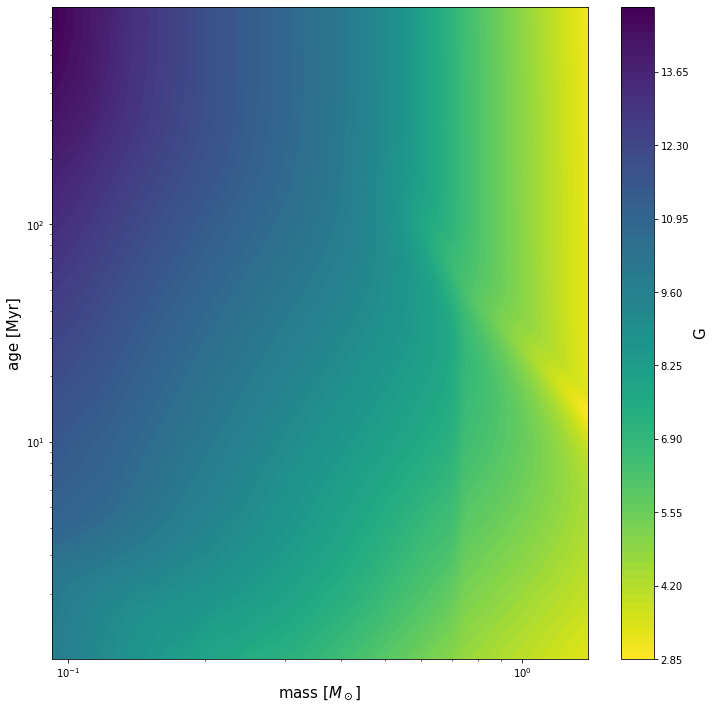

In [5]:
IsochroneGrid.plot_iso_grid('G','parsec',x_log=True,y_log=True)

Verified (21/04/2022) for **every** combination of filters (+ physical parameters as $T_{eff}$ etc) and models. It always works fine.

### Print info about a model

In [6]:
IsochroneGrid.info_models('atmo2020')

Model name: ATMO 2020
Reference: Phillips et al., A&A 637, A38 (2020)
Solar metallicity: Z=0.0169
Helium abundance: Y=0.275
Mass range: [0.001,0.075] M_sun
Age range: [1 Myr, 10 Gyr]
Filters: MKO-NIR (MKO_Y, MKO_J, MKO_H, MKO_K, MKO_Lp, MKO_Mp), WISE (W1, W2, W3, W4), Spitzer-IRAC (IRAC1, IRAC2), JWST (MIRI: MIRI_c_F1065C, MIRI_c_F1140C, MIRI_c_F1550C, MIRI_c_F2300C; MIRI_p_F560W, MIRI_p_F770W, MIRI_p_F1000W, MIRI_p_F1130W, MIRI_p_F1280W, MIRI_p_F1500W, MIRI_p_F1800W, MIRI_p_F2100W, MIRI_p_F2550W; NIRCAM: NIRCAM_c210_F182M, NIRCAM_c210_F187N, NIRCAM_c210_F200W, NIRCAM_c210_F210M, NIRCAM_c210_F212N; NIRCAM_c335_F250M, NIRCAM_c335_F300M, NIRCAM_c335_F322W2, NIRCAM_c335_F335M, NIRCAM_c335_F356W, NIRCAM_c335_F360M, NIRCAM_c335_F410M, NIRCAM_c335_F430M, NIRCAM_c335_F444W, NIRCAM_c335_F460M, NIRCAM_c335_F480M; NIRCAM_c430_F250M, NIRCAM_c430_F300M, NIRCAM_c430_F322W2, NIRCAM_c430_F335M, NIRCAM_c430_F356W, NIRCAM_c430_F360M, NIRCAM_c430_F410M, NIRCAM_c430_F430M, NIRCAM_c430_F444W, NIRCAM_c430_

### Data query

In [7]:
def show(s,**kwargs):
    if s=='dam_5stars':
        dam_file3=r'C:\Users\Vito\Desktop\PhD\Programmi\Python\MADYS\damiani_bf_stars2.txt'
        p1=SampleObject(dam_file3,id_type='DR2',**kwargs) #searchs for all data
    elif s=='proxima':
        prox_file=r'C:\Users\Vito\Desktop\PhD\Programmi\Python\MADYS\proxima.txt'
        p1=SampleObject(prox_file,id_type='EDR3',**kwargs)
    elif s=='dam_full':
        dam_file2=r'C:\Users\Vito\Desktop\PhD\Programmi\Python\MADYS\damiani_bf_stars.txt'
        p1=SampleObject(dam_file2,id_type='DR2',**kwargs) #searchs for all data  
    elif s=='100000stars':        
        s100000=r'C:\Users\Vito\Desktop\PhD\Programmi\Python\MADYS\100000_stars.csv' #(ra, dec) of bona-fide sources
        p1=SampleObject(s100000,id_type='EDR3',**kwargs) #searchs for all data 
    elif s=='no_dr2':        
        f_nodr2=r'C:\Users\Vito\Desktop\PhD\Programmi\Python\MADYS\no_dr2.csv' #(ra, dec) of bona-fide sources
        p1=SampleObject(f_nodr2,id_type='EDR3',**kwargs) #searchs for all data 
    elif s=='els_field':        
        f_els=r'C:\Users\Vito\Desktop\PhD\Programmi\Python\MADYS\els_field.csv' #ELS + background
        p1=SampleObject(f_els,id_type='EDR3',**kwargs) #searchs for all data 
    elif s=='1000stars':        
        f=r'C:\Users\Vito\Desktop\PhD\Programmi\Python\MADYS\1000stars.csv' #1000 random stars
        p1=SampleObject(f,id_type='EDR3',**kwargs) #searchs for all data 
    return p1.phot_table

show('dam_5stars',surveys=['gaia','2mass','wise'])

Total time needed to retrieve photometry for 5 targets: - 00:00:02.28
Time for the computation of extinctions:  1.1543736000000138  s


ID,edr3_id,dr2_id,tmass_id,allwise_id,ra,dec,edr3_epoch,edr3_parallax,edr3_parallax_error,edr3_parallax_over_error,edr3_pmra,edr3_pmra_error,edr3_pmdec,edr3_pmdec_error,edr3_ra_dec_corr,edr3_ra_parallax_corr,edr3_ra_pmra_corr,edr3_ra_pmdec_corr,edr3_dec_parallax_corr,edr3_dec_pmra_corr,edr3_dec_pmdec_corr,edr3_parallax_pmra_corr,edr3_parallax_pmdec_corr,edr3_pmra_pmdec_corr,edr3_phot_g_mean_mag,edr3_phot_g_mean_flux,edr3_phot_g_mean_flux_error,edr3_phot_bp_mean_flux,edr3_phot_bp_mean_flux_error,edr3_phot_bp_mean_mag,edr3_phot_rp_mean_flux,edr3_phot_rp_mean_flux_error,edr3_phot_rp_mean_mag,edr3_bp_rp,edr3_phot_bp_rp_excess_factor,edr3_ruwe,edr3_astrometric_params_solved,dr2_epoch,dr2_ra,dr2_dec,dr2_parallax,dr2_parallax_error,dr2_parallax_over_error,dr2_pmra,dr2_pmra_error,dr2_pmdec,dr2_pmdec_error,dr2_ra_dec_corr,dr2_ra_parallax_corr,dr2_ra_pmra_corr,dr2_ra_pmdec_corr,dr2_dec_parallax_corr,dr2_dec_pmra_corr,dr2_dec_pmdec_corr,dr2_parallax_pmra_corr,dr2_parallax_pmdec_corr,dr2_pmra_pmdec_corr,dr2_phot_g_mean_mag,dr2_phot_g_mean_flux,dr2_phot_g_mean_flux_error,dr2_phot_bp_mean_flux,dr2_phot_bp_mean_flux_error,dr2_phot_bp_mean_mag,dr2_phot_rp_mean_flux,dr2_phot_rp_mean_flux_error,dr2_phot_rp_mean_mag,dr2_bp_rp,dr2_phot_bp_rp_excess_factor,dr2_ruwe,dr2_astrometric_params_solved,radial_velocity,radial_velocity_error,j_m,j_msigcom,h_m,h_msigcom,ks_m,ks_msigcom,ph_qual,tmass_ra,tmass_dec,w1mpro,w1mpro_error,w2mpro,w2mpro_error,w3mpro,w3mpro_error,w4mpro,w4mpro_error,cc_flags,ext_flag,var_flag,ph_qual_2,tmass_key,wise_ra,wise_dec,edr3_gmag_corr,edr3_gflux_corr,edr3_phot_bp_rp_excess_factor_corr,edr3_phot_g_mean_mag_error,edr3_phot_bp_mean_mag_error,edr3_phot_rp_mean_mag_error,dr2_phot_bp_rp_excess_factor_corr,dr2_g_mag_error,dr2_bp_mag_error,dr2_rp_mag_error
,,,,,deg,deg,yr,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,mag,electron / s,electron / s,electron / s,electron / s,mag,electron / s,electron / s,mag,mag,,,,yr,deg,deg,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,mag,electron / s,electron / s,electron / s,electron / s,mag,electron / s,electron / s,mag,mag,,,,km / s,km / s,mag,mag,mag,mag,mag,mag,,deg,deg,mag,mag,mag,mag,mag,mag,mag,mag,,,,,,deg,deg,mag,'electron'.s**-1,,mag,mag,mag,,mag,mag,mag
str28,object,object,object,object,float64,float64,float64,float64,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float32,float64,float32,float32,float64,float32,float32,float32,float32,float32,int16,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float32,float64,float64,float32,float32,float32,float32,int16,float64,float64,float32,float32,float32,float32,float32,float32,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,int16,object,object,int64,float64,float64,float32,float64,float32,float64,float64,float64,float32,float64,float64,float64
Gaia DR2 5364724700323400704,Gaia EDR3 5364724700323400704,Gaia DR2 5364724700323400704,10304069-4809006,,157.6693908070584,-48.150173490469,2016.0,7.694504002675636,0.016904518,455.1744,-26.042062183136295,0.017626585,2.122200465393095,0.019002562,0.22326018,-0.066583514,-0.28965095,-0.07291952,0.122062795,-0.05801573,-0.30729574,0.12988837,-0.015411283,0.24223883,14.463826,30861.452307826446,32.119118,6550.590392901756,32.525906,15.797841,37252.78509421986,103.45623,13.319999,2.4778423,1.4193556,1.0622715,31,2015.5,157.66939622518927,-48.150173775678454,7.626506124956317,0.03508174106484546,217.39247,-26.030115179360216,0.06472771010728053,2.033002183381313,0.0684717354809097,0.13726173,-0.12120201,-0.44884798,-0.053068135,0.20600867,-0.072801255,-0.44958127,-0.0708433,-0.16357431,0.3807051,14.476107,30542.420039259527,39.14865165741708,6599.7961954163275,40.610601097643716,15.802562,37257.585125

Results:

- dam_full (10394 stars): the query took 4.5 minutes (21/04/2022) in one occasion, 3.4 minutes in another (22/04/2022);
- 100000stars (100000 stars): the query took 18:22 minutes on 22/04/2022 (11:47 for the first query, 3:35 for the 2MASS query of missing objects, 3:00 for the SIMBAD query of individual 2MASS objects). The computation of extinctions took 40 s;
- els_field (6343 stars): the query took on 22/04/2022 (00:56 for the first query, 46 s for the 2MASS query of missing objects, 180 s for the SIMBAD query of individual 2MASS objects);
- 1000stars (1000 stars): 8 s for the first query, 0.9 s for 2MASS, 58 s for the SIMBAD query.

### Speed test: extinction maps

In [8]:
if 'p1' not in locals():
    f=r'C:\Users\Vito\Desktop\PhD\Programmi\Python\MADYS\1000stars.csv' #1000 random stars
    p1=SampleObject(f,id_type='EDR3') #searchs for all data 

t0=time.perf_counter()
ra=np.array(p1.good_phot['ra'].filled(np.nan))
dec=np.array(p1.good_phot['dec'].filled(np.nan))
par=np.array(p1.good_phot['edr3_parallax'].filled(np.nan))
par_err=np.array(p1.good_phot['edr3_parallax_error'].filled(np.nan))

tt0=time.perf_counter()
SampleObject.interstellar_ext(ra=ra,dec=dec,par=par)
tt1=time.perf_counter()
SampleObject.interstellar_ext(ra=ra,dec=dec,par=par,ext_map='stilism')
tt2=time.perf_counter()
#MADYS.interstellar_ext(ra=ra,dec=dec,par=par,error=True)
#tt2=time.perf_counter()
print("Total time needed to compute extinction for "+ str(len(ra))+ " targets (Leike's map): - {:.2f}".format(tt1-tt0)+' s')
print("Total time needed to compute extinction for "+ str(len(ra))+ " targets (STILISM map): - {:.2f}".format(tt2-tt1)+' s')

Total time needed to retrieve photometry for 1000 targets: - 00:00:20.38
Time for the computation of extinctions:  0.9290407000000016  s
Total time needed to compute extinction for 1000 targets (Leike's map): - 0.87 s
Total time needed to compute extinction for 1000 targets (STILISM map): - 5.30 s


### Mass estimate for a SPHERE CC

Example: mass estimate for the candidate companion of $\delta$ Lupi.
We try to see if everything works using different values for the parameters:

- verbose: level of verbosity (0-3);
- phys_param: whether to compute (logg, logL, radius, Teff) or not;
- n: number of iterations (default: 1000).

In [9]:
path_aa=r'C:\Users\Vito\Desktop\PhD\Progetti\BEAST\HIP75141'
ebv=SampleObject.interstellar_ext(ra=230.34292059535883,dec=-40.64760760160889,par=6.729571945649031)
file_b=Table([['IRDIS planet'],[14.395+3.960],[14.179+3.960],[np.sqrt(0.268**2+0.072**2)],[np.sqrt(0.268**2+0.085**2)],[6.7296],[0.4819]],names=('name','SPH_K1','SPH_K2','SPH_K1_err','SPH_K2_err','parallax','parallax_err'))
#mu2_b=SampleObject(file_b,ebv=ebv,verbose=0)

verb=0
n=1000

mu2_b=SampleObject(file_b,mock_file=os.path.join(path_aa,'del_lup_b.txt'),ebv=ebv,verbose=verb)
res1_b=mu2_b.get_params('ames_dusty',mass_range=[0.005,0.1],age_range=np.array([[20,16,24]]),m_unit='m_jup',ph_cut=0.8,n_try=n,phys_param=False)

res1_b['masses'],res1_b['masses_min'],res1_b['masses_max']

(array([8.40664229]), array([7.70601263]), array([9.17097311]))

### Age estimate for a list of stars

In [50]:
from astropy.coordinates import Distance
import pickle

def load_ELS(refresh=False):
    path=r'C:\Users\Vito\Desktop\PhD\My papers\mu2 Sco'
    els_file=r'C:\Users\Vito\Desktop\PhD\My papers\mu2 Sco\ELS.csv'
    els0 = pd.read_csv(els_file,sep=',')

    ra_e, dec_e, par_e, par_err_e = els0['ra'].to_numpy(), els0['dec'].to_numpy(), els0['parallax'].to_numpy(), els0['parallax_error'].to_numpy()
    pmra_e, pmra_err_e, pmdec_e, pmdec_err_e = els0['pmra'].to_numpy(), els0['pmra_error'].to_numpy(), els0['pmdec'].to_numpy(), els0['pmdec_error'].to_numpy()
    v_ra_e, v_dec_e = 4.74*pmra_e/par_e, 4.74*pmdec_e/par_e
    coo_e = SkyCoord(ra=ra_e*u.deg,dec=dec_e*u.deg,distance=Distance(parallax=par_e*u.mas))
    gc0_e = coo_e.transform_to(Galactic)
    gl_e, gb_e = gc0_e.l.deg, gc0_e.b.deg
    rv_e, rv_err_e = els0['dr2_radial_velocity'].to_numpy(), els0['dr2_radial_velocity_error'].to_numpy()
    els,=np.where((np.abs(pmra_e+11.7)<7) & (np.abs(pmdec_e+23.1)<7) & (pmdec_e>-25) & (pmra_e<-10.2) & (v_dec_e<-16) & (v_dec_e>-21) & (par_e<6.5) & (par_e>5.3) & (v_ra_e<-7) & (v_ra_e>-10) & (gl_e>345) & (gl_e<347.5) & (gb_e>3.3) & (gb_e<5))
    
    PIK=r'C:\Users\Vito\Desktop\PhD\My papers\mu2 Sco\all_data_ELS.pkl'
    if SampleObject.file_search(PIK)==False: refresh=True
    
    if refresh==False:
        with open(PIK,'rb') as f:
            els_obj=pickle.load(f)
    else:
        els_ids=els0['source_id'].to_numpy()[els]
        els_ids_list = ['Gaia EDR3 '+str(i) for i in els_ids]
        els_obj=SampleObject(els_ids_list,id_type='EDR3',mock_file=path+'damiani_sample_data.txt')
        with open(PIK,'wb') as f:
            pickle.dump(els_obj,f)
    
    return ra_e[els],dec_e[els],par_e[els],par_err_e[els],pmra_e[els],pmra_err_e[els],pmdec_e[els],pmdec_err_e[els],rv_e[els],rv_err_e[els],gl_e[els],gb_e[els],v_ra_e[els],v_dec_e[els],els_obj

ra_e,dec_e,par_e,par_err_e,pmra_e,pmra_err_e,pmdec_e,pmdec_err_e,rv_e,rv_err_e,gl_e,gb_e,v_ra_e,v_dec_e,els_obj=load_ELS(refresh=True)

#res1=els_obj.get_agemass('bhac15',age_range=[1,300],n_try=200)
res1=els_obj.get_params('bhac15',age_range=[1,300],n_try=200,save_maps=True,verbose=0)

Total time needed to retrieve photometry for 73 targets: - 00:00:03.88
Time for the computation of extinctions:  0.4559332999997423  s
0 0.2462147158103662 0.23888812539659632 0.2537660094277885 12.375853953439513 11.400660460390206 13.434463872422196
1 0.55437572700439 0.5438366904972818 0.5651189999899098 13.118183765463739 12.400974473846055 13.876872794747813
2 0.31381775732481965 0.3068401012209865 0.32095408787997004 12.70937163796622 11.93661906800228 13.532150645984682
3 0.8371435906936807 0.8351764434081954 0.8391153713335587 18.8251897551456 17.560121034565736 20.18139673523059
4 0.12693753556534731 0.12254349829773128 0.131489129649746 3.499869124426818 3.2360672054555386 3.785175989999827
5 0.1743248226071911 0.16751915434645132 0.18140697937251973 10.251368997574044 9.28605160284217 11.31703449636844
6 nan nan nan nan nan nan
7 0.11137602381793076 0.10584478958245541 0.1171963091468835 8.467822497043244 7.603478080177309 9.430423430609741
8 0.13267984047227108 0.1263391961

Star 5


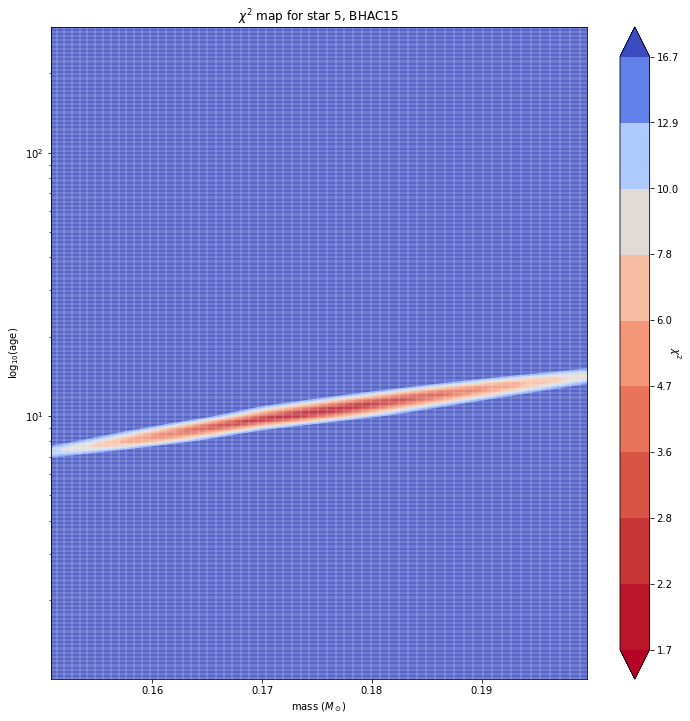

In [51]:
#plt.contourf(res1['weight_maps'][0])
res1.plot_maps(5)

0 nan nan nan nan nan nan
0 1.599315509057842 1.5829783594997833 1.6158212663887614 14.243614942836357 13.11627258047499 15.467852272436087
0 1.5570243977563707 1.550349414084426 1.563728120373624 13.42184485480299 13.15816227146007 13.690811497068728
BHAC15
[{}]
PARSEC
[{'masses': array([1.59931551, 1.58297836, 1.61582127]), 'ages': array([14.24361494, 13.11627258, 15.46785227]), 'logg': array([4.24117428, 4.23693837, 4.27095756]), 'Teff': array([7281.87895724, 7059.17832535, 7630.37363056]), 'logL': array([0.80180932, 0.74090168, 0.85764514]), 'radii': array([1.58992611, 1.54424676, 1.60592903]), 'prob': array([1.])}]
MIST
[{'masses': array([[1.5570244 , 1.55034941, 1.56372812],
       [1.61399159, 1.60687211, 1.62114261]]), 'ages': array([[13.42184485, 13.15816227, 13.6908115 ],
       [11.56262819, 11.2641331 , 11.86903328]]), 'logg': array([[4.23218866, 4.21644372, 4.2465736 ],
       [4.23019373, 4.2243909 , 4.23367509]]), 'Teff': array([[7271.00883696, 7202.33357723, 7348.350745

Star 0


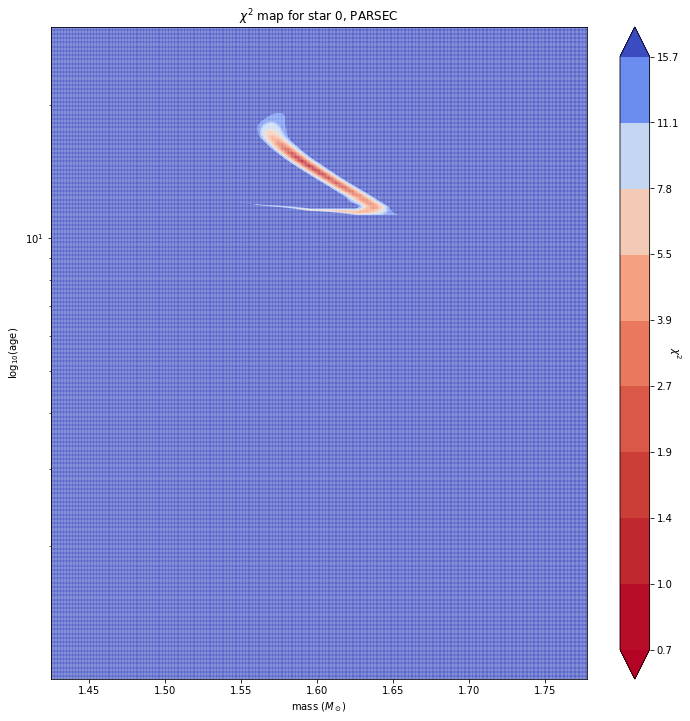

Star 0


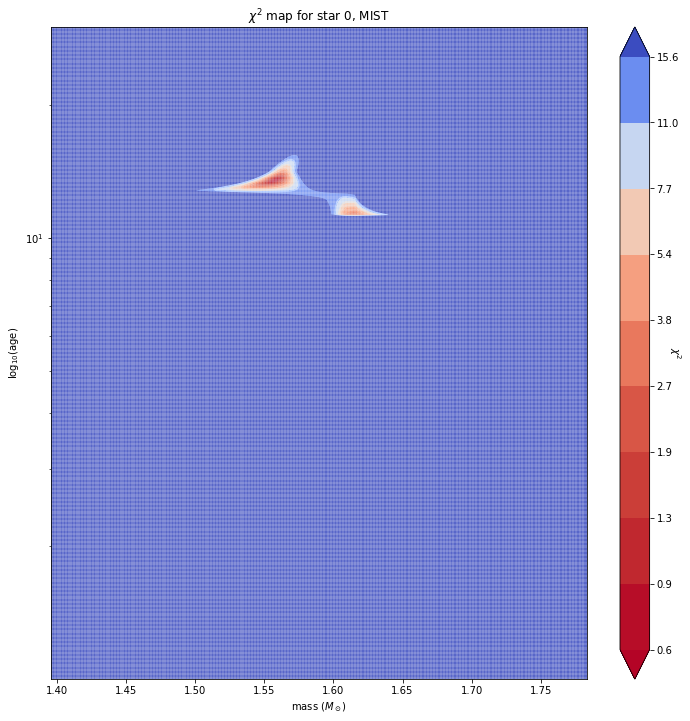

In [53]:
res1.plot_maps()
res2.plot_maps()

### Mass estimate for $\beta$ Pictoris b

In [54]:
file_b=Table([['beta Pic b'],[9+3.526],[np.sqrt(0.222**2+0.2**2)],[50.930690628822894],[0.14821085]],names=('name','SPH_K1','SPH_K1_err','parallax','parallax_err'))
if 'res_b' not in locals():
    obj_b=SampleObject(file_b,verbose=0)
    res_b=obj_b.get_params('ames_dusty',mass_range=[0.005,0.1],age_range=np.array([[15,12,21]]),m_unit='m_jup',ph_cut=0.8,n_try=10000)

res_b['masses'],res_b['masses_min'],res_b['masses_max']

(array([10.78420951]), array([9.56445537]), array([11.94255299]))

## Comparison with external catalogs

We assess the accuracy of best-fit radii by taking a sample of stars with interferometric radius measurements. The sample is done by assembling:

- Huber et al. (2012);
- Boyajian et al. (2012a);
- Boyajian et al. (2012b);

Angular diameters are turned into radii by means of Gaia EDR3 parallaxes.

In [60]:
from uncertainties import ufloat, unumpy
from uncertainties.umath import *  # sin(), etc.

l_hub=['HD 173701','HD 175726','HD 177153','HD 181420','HD182736','HD187637'] #Huber et al., ApJ 760, 32 (2012)
l_boy1=['GJ 15A','GJ 33','GJ 105','GJ 166A','GJ 205','GJ 338A','GJ 338B','GJ 380','GJ 411','GJ 412A',
        'GJ 526','GJ 631','GJ 687','GJ 699','GJ 702A','GJ 702B','GJ 725A','GJ 725B','GJ 809','GJ 880','GJ 892']
l_boy2=['HD 4614','HD 5015','HD 6582','HD 10780','HD 16895','HD 19373','HD 20630','HD 22484','HD 30652',
        'HD 34411','HD 39587','HD 48737','HD 56537','HD 58946','HD 81937','HD 82328','HD 82885','HD 86728',
        'HD 90839','HD 95418','HD 97603','HD 101501','HD 102870','HD 103095','HD 109358','HD 114710',
        'HD 118098','HD 126660','HD 128167','HD 131156','HD 141795','HD 142860','HD 146233','HD 162003',
        'HD 164259','HD 173667','HD 177724','HD 182572','HD 185144','HD 185395','HD 210418','HD 213558',
        'HD 215648','HD 222368']

hub_radii=np.array([0.332,0.346,0.289,0.34,0.436,0.231])
hub_radii_err=np.array([0.006,0.007,0.006,0.01,0.005,0.006])
boy1_radii=np.array([1.005,0.868,1.030,1.504,0.943,0.871,0.856,1.225,1.432,0.764,0.835,0.724,0.859,0.952,1.515,1.221,0.937,0.851,0.722,0.744,1.106])
boy1_radii_err=np.array([0.005,0.004,0.007,0.006,0.004,0.015,0.016,0.009,0.013,0.017,0.014,0.011,0.014,0.005,0.005,0.015,0.008,0.015,0.008,0.004,0.007])
boy2_radii=np.array([1.623,0.846,0.947,0.744,1.078,1.217,0.914,1.056,1.488,0.958,1.027,1.369,0.824,0.837,1.113,1.591,0.8,0.753,0.778,
                     1.133,1.304,0.887,1.396,0.679,1.209,1.1,0.84,1.086,0.824,1.163,0.756,1.191,0.763,0.93,0.761,0.979,0.883,0.823,
                     1.219,0.845,0.849,0.625,1.068,1.059])
boy2_radii_err=np.array([0.004,0.01,0.009,0.018,0.008,0.007,0.024,0.014,0.004,0.015,0.009,0.009,0.013,0.013,0.009,0.005,0.012,0.012,0.014,
                         0.014,0.008,0.009,0.006,0.005,0.03,0.011,0.009,0.007,0.013,0.014,0.017,0.005,0.017,0.025,0.027,0.006,0.016,0.025,
                         0.011,0.015,0.017,0.021,0.008,0.009])

int_sample=list(np.hstack((l_hub,l_boy1,l_boy2)))
int_radii=np.hstack((hub_radii,boy1_radii,boy2_radii))
int_radii_err=np.hstack((hub_radii_err,boy1_radii_err,boy2_radii_err))

int_obj=SampleObject(int_sample,verbose=0,id_type='other')
p=np.array([ufloat(int_obj.par[i],int_obj.par_err[i]) for i in range(len(int_obj))])

r_interf, r_interf_err = np.array([i.n for i in int_radii/2/p*u.au.to(R_sun)]), np.array([i.s for i in int_radii/2/p*u.au.to(R_sun)])

hub_feh=np.array([0.34,-0.07,-0.09,0.00,-0.15,-0.17])
boy1_feh=np.array([-0.36,-0.22,-0.08,-0.24,0-35,-0.18,-0.15,-0.16,-0.41,-0.4,-0.3,
                  0.04,-0.09,-0.39,0.03,0.03,-0.49,-0.36,-0.21,0.06,0.07])
boy2_feh=np.array([-0.3,0.0,-0.83,0.05,-0.12,0.09,0.0,-0.09,-0.03,0.05,-0.16,0.01,
                  -0.31,0.06,-0.12,0.06,0.2,-0.16,0.06,0.2,-0.16,0.06,0.0,-0.12,
                  0.11,-1.36,-0.3,-0.06,-0.02,-0.14,-0.36,-0.33,-0.19,-0.02,
                  -0.17,-0.14,-0.15,-0.68,0.33,-0.24,-0.04,-0.38,-0.24,-0.08])
feh=np.hstack((hub_feh,boy1_feh,boy2_feh))

int_res=int_obj.get_params('parsec',age_range=[500,7000],verbose=False,feh=feh)

0 1.0867796765947368 1.0805859176623414 1.0930089372388292 861.013508938312 622.7537629141754 1190.4291980591902
1 1.078171074120232 1.074164594757657 1.0821924970742838 5135.038270063975 4940.689917145677 5337.031563853987
2 1.3603373062365094 1.3570016825202185 1.363681129195086 2140.496205481928 2054.7241836047283 2229.8486785922446
3 0.7671079317225717 0.7661348210937231 0.7680822783535832 6651.652929961308 6489.999619863341 6817.332710659619
4 0.8415836331544215 0.8414956233164858 0.8416716521970774 6805.286811979486 6772.725096109681 6838.005077144491
5 0.42895060437216126 0.42844076854863034 0.42946104688998 5622.930614731822 4975.6574614637675 6354.406215251605
6 0.8574826638780213 0.857062839072322 0.8579026943312641 6785.290159900429 6736.573462507876 6834.359160525189
7 0.6871377474405326 0.6868824966669964 0.6873930930672028 6647.20092434089 6549.613357854578 6746.2425206473445
8 0.5410038197036858 0.5410038197036858 0.5410038197036858 6356.995013275559 6237.479127758549 64

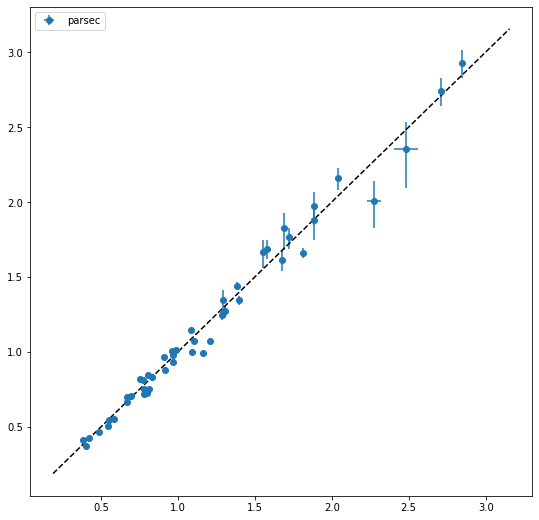

0.01259347274874899 0.060638328814040535


In [61]:
r_min=np.min([np.nanmin(r_interf),np.nanmin(int_res['radii'])])
r_max=np.max([np.nanmax(r_interf),np.nanmax(int_res['radii'])])
plt.figure(figsize=(9,9))
plt.errorbar(r_interf,int_res['radii'],xerr=r_interf_err,yerr=np.vstack((int_res['radii_max']-int_res['radii'],int_res['radii']-int_res['radii_min'])),label='parsec',fmt='o')
plt.plot([r_min,r_max],[r_min,r_max],linestyle='dashed',color='black')
plt.legend()
plt.show()

a0=(r_interf-int_res['radii'])/int_res['radii']
print(np.nanmean(a0),np.nanstd(a0))